## Import libraries


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sc
import tensorflow as tf
import numpy as np

In [2]:
!pip install wrapt --upgrade --ignore-installed
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/68/8c/42bbb31a25a708e2e24881724ec7bcea05530492de8b1a2e0d8fe43eb2f6/tensorflow-2.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl


## Explore data

In [2]:
#pd.set_option('display.max_columns',None)
df=pd.read_csv("C:/Users/Gunisha Chaturvedi/Dropbox/My PC (LAPTOP-1CT80JS5)/Documents/minor/WDIEXCEL2.csv")

In [ ]:
df.head()
print(df.shape)

#get unique indicator values
indi_unique=len(list(df.Indicator_Name.unique()))
print(indi_unique)

#get unique indicator names
country_unique=len(list(df.Country_Name.unique()))
print(country_unique)

#frequency of each unique indicator
print(df['Indicator_Name'].value_counts())

## Clean data 

In [3]:
#check for rows which have null values for all years 
df1=df[df.loc[:,'1960':'2020'].isnull().all(axis=1)]

#get column wise sum of null values
print(df.isnull().sum().sort_values(ascending=False))

#remove those rows
df.drop(list(df1.index),inplace=True)
print(df.shape)
df.to_csv('C:/Users/hp1/Documents/minor/WDIEXCEL2.csv')

In [17]:
#return rows where a column is not nan

df2=df.where(df['2020'].notna())
df2.dropna(how='all',inplace=True)
df2.to_csv('C:/Users/hp1/Documents/minor/2020notnull.csv')

In [ ]:
#stacked bar graph

df1=df.where((df['Indicator_Code']=='SL.TLF.0714.WK.ZS') | (df['Indicator_Code']=='SL.TLF.0714.SW.ZS'))
df1.dropna(how='all',inplace=True)
print(df1.shape)
print(df1.head(10))
df1.to_csv('C:/Users/hp1/Documents/minor/education1.csv')

In [15]:
df_new=df.loc[0:1439,'Indicator_Name'] #since number of unique indicators is 1440

stop_words = set(stopwords.words('english'))
for i in range(0,df_new.size):
    df_new.loc[i]=re.sub('\(.*?\)',"",df_new.loc[i])        #remove content within brackets
    df_new.loc[i] = re.sub(r'[^\w\s]',"", df_new.loc[i])    #remove punctuations
    df_new.loc[i]= re.sub('\d',"",df_new.loc[i])           #remove numbers
    word_tokens = word_tokenize(df_new.loc[i])
    df_new.loc[i]=" ".join(filter(lambda x: x not in stop_words , word_tokens))   #remove stop words

## Vectorisation

In [16]:
#apply tf-idf vectorization

#v=CountVectorizer() 
v=TfidfVectorizer()
v1=v.fit_transform(df_new)
#print(v.get_feature_names())
#print(v.vocabulary_)
arr=v1.toarray()

In [14]:
df3= pd.read_csv("C:/Users/Gunisha Chaturvedi/Dropbox/My PC (LAPTOP-1CT80JS5)/Documents/minor/WDIEXCEL2.csv")
df_orig=df3.loc[0:1439,'Indicator_Name']
df_orig.head()

0    Access to clean fuels and technologies for coo...
1              Access to electricity (% of population)
2    Access to electricity, rural (% of rural popul...
3    Access to electricity, urban (% of urban popul...
4    Account ownership at a financial institution o...
Name: Indicator_Name, dtype: object

## PCA and k-means

In [18]:
#apply k-means

Kmean = KMeans(n_clusters=13,random_state=0)
cluster=Kmean.fit_predict(principalDf)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(arr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.shape

(1440, 2)

In [19]:
len(cluster)

1440

In [30]:
new_df = pd.concat([principalDf,s], axis=1)
new_df.columns

Index(['principal component 1', 'principal component 2', 0], dtype='object')

In [31]:
new_df.rename(columns={0:'Cluster'},inplace=True)

In [32]:
new_df.columns

Index(['principal component 1', 'principal component 2', 'Cluster'], dtype='object')

In [13]:
pca1 = PCA(0.9)
pca1.fit(arr)
pca1.n_components_

249

In [20]:
#df2=pd.Series(list(cluster))
#df_orig=pd.concat([df_orig,df2],axis=1)
#df_orig.head()
#df_orig.rename(columns={0:'Cluster'},inplace=True)
#df_orig.to_csv("C:/Users/hp1/Documents/minor/withcluster.csv")
centers=Kmean.cluster_centers_
#print(Kmean.labels_)

In [21]:
centers.shape   #after applying pca

(13, 2)

In [35]:
# for i in range(0,13):
df_orig.shape
#print(df['Indicato'].value_counts())

(1440,)

In [35]:
df_orig.sort_values('Cluster',inplace=True)
df_orig.head(10)

,Indicator_Name,Cluster
943,ARI treatment (% of children under 5 taken to ...,0
371,"International tourism, receipts (current US$)",0
372,"International tourism, receipts for passenger ...",0
1214,"International tourism, receipts for passenger ...",0
373,"International tourism, receipts for travel ite...",0
1215,"International tourism, receipts for travel ite...",0
391,Labor tax and contributions (% of commercial p...,0
1233,Labor tax and contributions (% of commercial p...,0
392,Land area (sq. km),0
1234,Land area (sq. km),0


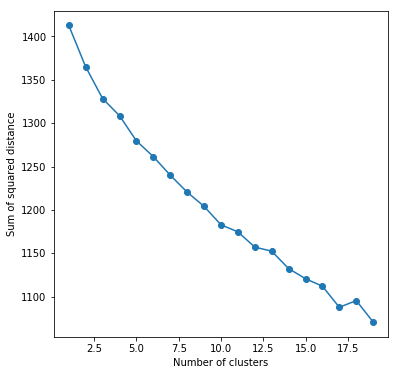

In [28]:
#implement elbow method

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(arr)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

## Calculate Dunn Index

In [22]:
from sklearn.metrics import pairwise_distances as p_dist

#calculate pairwise distances between cluster centers
d_mat = p_dist(centers, metric= 'euclidean')

#remove duplicates and get min distance
d_mat_unique = set(d_mat.flatten()) 
d_mat_unique.remove(0)
min(d_mat_unique)

0.0395392458105444

In [7]:
#map
df3=df.where((df['Indicator_Code']=='SM.POP.REFG'))
df3.dropna(how='all',inplace=True)
print(df3.shape)
#print(df3.head(10))
#df3.to_csv('C:/Users/hp1/Documents/minor/refugee.csv')

(116, 65)


In [29]:
# df_refugee=pd.read_csv("C:/Users/hp1/Documents/minor/refugee.csv")
# print(df_refugee.isnull().sum().sort_values(ascending=False))

In [15]:
#calculate silhouette score
print(sc(arr,cluster))

0.0998760750948121


In [2]:
#word2vec implementation
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']


def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

corpus = remove_stop_words(corpus)

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

print(sentences)

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


In [3]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        
words=set(words)       #to remove duplicates 
word2int={}
for i,word in enumerate(words):
    word2int[word] = i

print(word2int)

{'strong': 0, 'pretty': 1, 'queen': 2, 'young': 3, 'girl': 4, 'wise': 5, 'boy': 6, 'man': 7, 'princess': 8, 'prince': 9, 'king': 10, 'woman': 11}


In [4]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [27]:
print(data)

[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman'], ['wise', 'queen'], ['wise', 'woman'], ['woman', 'queen'], ['woman', 'wise'], ['boy', 'young'], ['boy', 'man'], ['young', 'boy'], ['young', 'man'], ['man', 'boy'], ['man', 'young'], ['girl', 'young'], ['girl', 'woman'], ['young', 'girl'], ['young', 'woman'], ['woman', 'girl'], ['woman', 'young'], ['prince', 'young'], ['prince', 'king'], ['young', 'prince'], ['young', 'king'], ['king', 'prince'], ['king', 'young'], ['princess', 'young'], ['princess', 'queen'], ['young', 'princess'], ['young', 'queen'], ['queen', 'princess'], ['queen', 'young'], ['man', 'strong'], ['strong', 'man'], ['woman', 'pretty'], ['pretty', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'prince'], ['boy', 'king'], ['king', 'prince'], ['king', 'boy'], ['princess', 'girl'], ['princess', 'queen'], ['girl', 'princess'], ['girl', 'queen'], ['queen', 'princess']

In [7]:
df=pd.DataFrame(data,columns=['Input','Label'])
df

,Input,Label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [11]:
ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['Input'], df['Label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

In [ ]:
#X and Y are one hot encoded arrays of input words and output words

In [14]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x = tf.placeholder(tf.float32, shape=(1, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(1, ONE_HOT_DIM))

In [22]:
tf.__version__

'2.4.1'